# CONDUCCIÓN DE CALOR EN 1D (INTERACTIVO)
*Virgil Ortiz Lascurain*

**Fecha de finalización:** 21 de febrero de 2023

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Definimos la función para simiular la conducción tomando en cuenta parámetros físicos e independientes:

def conduccion_1d(k, S, L, TA, TB, N):
    
    #Docstring:
    
    """
    Parameters
    ----------
    
    L: float
    L es la longitud del dominio
    
    S: float
    Es la fuente.
    
    k: float
    Es la conductividad del material.
    
    TA: float
    Es la condición de la frontera izquierda.
    
    TB: float
    Es la condición de la forntera derecha.

    N: int
    Es el número de nodos internos (grados de libertad).
    
    Return
    ------
    Perfil de temperatura del dominio.
    
    """
    h = L / (N + 1)

    # arrays para almacenar datos:
    T = np.zeros(N + 2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = k / h**2
    b[:] = S / r #Al poner una posición específica dentro de los conchetes arroja un pico en la gráfica

    T[0] = TA
    T[-1] = TB

    b[0] += TA
    b[-1] += TB

    #Definición de la matriz:
    A[0,0] = 2
    A[0,1] = -1
    for i in range(1,N-1):
        A[i,i] = 2 #Diagonal
        A[i,i+1]= -1 #Diagonal superior
        A[i,i-1]= -1 #Diagonal inferior
    A[-1,-2] = -1
    A[-1,-1] = 2

    #Solución del sistema de ecuaciones:
    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T, 'o-', color = 'cornflowerblue') #Graficación con nodos
    plt.show()

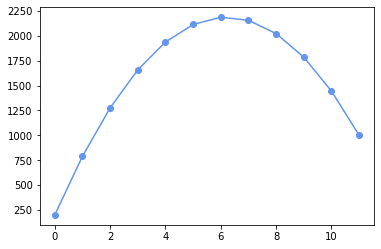

In [15]:
conduccion_1d(0.02,10.0,5.0,200,1000,10) #Implementación en un caso de estudio particular

In [16]:
import ipywidgets as widgets

In [17]:
# Con la función establecida creamos una versión interactiva de un determinado caso de estudio:
w = widgets.interactive(conduccion_1d,
                       k = widgets.fixed(0.02),
                       S = widgets.FloatSlider(max=1., min=0.0, value=0, step=0.2),
                       L = widgets.fixed(5.0),
                       TA = widgets.fixed(200),
                       TB = widgets.fixed(1000),
                       N = widgets.IntSlider(max = 10, min=4, value=4))

In [18]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…